This script performs a general quality analysis on the instances were the Time_quality was assessed to be 1, 2, or 3 for ISIS - 1 and ISIS - 2. 

To generate seperate .CSV files for the two satellites please consult notebooks 03_Metadata Postprocessing.ipynb: https://github.com/asc-csa/Alouette_extract/blob/ISIS-working/03_Metadata%20Postprocessing.ipynb

### ISIS - 1 General Quality Analysis

#### satellite code

Per the inventory of ISIS, the subdirectory has the name of the satellites. Meaning, a subdirectory with "B1-35-28 ISIS B D-889" name contains all the images from ISIS B also known as ISIS 2. Same applies for ISIS A  also known as ISIS - 1. 

The ISIS-1_metadata.csv and ISIS-2_metadata.csv were created based on the name of the logic on 03_Metadata Postprocessing.ipynb. 

The metadata on the ionorgams of ISIS - 1 will start with number 3, and the metadata for ISIS - 2 will start with number 4 to reflect the difference between the two satellites. If the numbers read by OCR does not follow this logic it would be an error from the algorithm. 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version1.csv')

In [81]:
#Satellite code: The satellite code should be 3 for ISIS - 1
satellite_counts = df['Satellite_Code'].value_counts()

count_3 = satellite_counts.get(3, 0)  
count_not_3 = df.shape[0] - count_3   

print("Count of cases where Satellite_Code is 3:", count_3)
print("Count of cases where Satellite_Code is not 3:", count_not_3)

Count of cases where Satellite_Code is 3: 383849
Count of cases where Satellite_Code is not 3: 16798


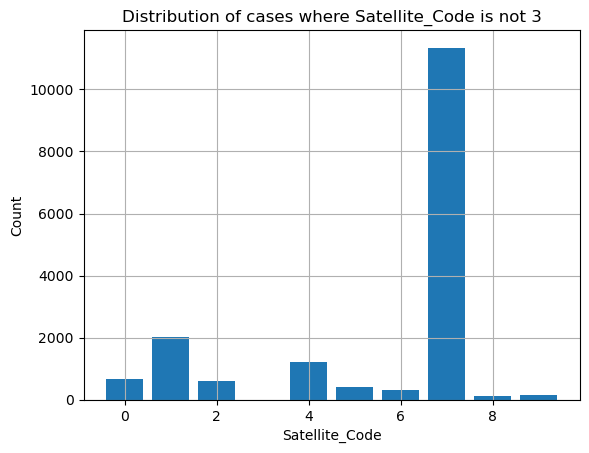

In [82]:
not_3_counts = df.loc[df['Satellite_Code'] != 3, 'Satellite_Code'].value_counts()
plt.bar(not_3_counts.index, not_3_counts.values)
plt.xlabel('Satellite_Code')
plt.ylabel('Count')
plt.title('Distribution of cases where Satellite_Code is not 3')
plt.grid(True)
plt.show()

In [83]:
df['Adjusted_Satellite_Code'] = 3 #created a new column and adjusted the stations to 3

In [84]:
df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version2.csv', index=False)

#### Station Number 

First, each subdirectory was manually checked. The 3rd and 4th digit on the metadata was recorded in the following excel sheet "Location_match.csv". The values were added to the CSV file in a column called "Adjusted_Station_Number". 


In [85]:
df1= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version2.csv')

In [86]:
location_match= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Location_match.csv')

In [87]:
merged_df = pd.merge(df1, location_match[['Directory', 'Subdirectory', 'Station_Number']], 
                     on=['Directory', 'Subdirectory'], how='left')

In [88]:
merged_df.rename(columns={'Station_Number_y': 'Adjusted_Station_Number'}, inplace=True)
merged_df.rename(columns={'Station_Number_x': 'Station_Number'}, inplace=True)

In [89]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version3.csv', index=False)

Station_quality shows the level of confidence with 1 if "Adjusted_Station_Number is equal to "Station_Number" column read by OCR. Otherwise it will add a zero. 

In [92]:
merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version3.csv')
merged_df['Station_quality'] = (merged_df['Adjusted_Station_Number'] == merged_df['Station_Number']).astype(int)

C:\Users\rsheikholmolouki\AppData\Local\Temp\ipykernel_4536\1696895714.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version3.csv')


In [93]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version4.csv', index=False)

In [94]:
num_instances_with_quality_0 = (merged_df['Station_quality'] == 0).sum()
print("Number of instances where OCR did not read the Station Number correctly:", num_instances_with_quality_0)

Number of instances where OCR did not read the Station Number correctly: 71922


In [95]:
total_instances = len(merged_df)
percentage_quality_0 = (num_instances_with_quality_0 / total_instances) * 100
print("Percentage of instances where OCR did not read the Station Number (3rd and 4th digit) correctly: {:.2f}%".format(percentage_quality_0))

Percentage of instances where OCR did not read the Station Number (3rd and 4th digit) correctly: 17.95%


Finally, we will adjust the Station_Location, Latitude and Longitude based on the "Adjusted_Station_Number" Value.

In [96]:
csv1= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version4.csv')

C:\Users\rsheikholmolouki\AppData\Local\Temp\ipykernel_4536\1810440425.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  csv1= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version4.csv')


In [97]:
csv2= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/Station_Number_Name_Location - Copy.csv')

In [98]:
merged_df = pd.merge(csv1, csv2, left_on='Adjusted_Station_Number', right_on='Number', how='inner')

In [99]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version5.csv', index=False)

### Creation of the Final Master ISIS I CSV File
The original columns that were later adjusted were dropped in this version. 

In [100]:
columns_to_drop = ['Satellite_Code', 'Station_Number', 'Station_Location_x', 'Station_ID_x','Station_Lat','Station_Lon']  
merged_df.drop(columns=columns_to_drop, inplace=True)

In [101]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_MD_Version6.csv', index=False)

### ISIS - 2 General Quality Analysis

#### satellite code

Per the inventory of ISIS, the subdirectory has the name of the satellites. Meaning, a subdirectory with "B1-35-28 ISIS B D-889" name contains all the images from ISIS B also known as ISIS 2. Same applies for ISIS A  also known as ISIS - 1. 

The ISIS-1_metadata.csv and ISIS-2_metadata.csv were created based on the name of the logic on 03_Metadata Postprocessing.ipynb. 

The metadata on the ionorgams of ISIS - 1 will start with number 3, and the metadata for ISIS - 2 will start with number 4 to reflect the difference between the two satellites. If the numbers read by OCR does not follow this logic it would be an error from the algorithm. 

In [102]:
df2 = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version1.csv')

In [103]:
#Satellite code: The satellite code should be 4 for ISIS - 2
satellite_counts = df2['Satellite_Code'].value_counts()

count_4 = satellite_counts.get(4, 0)  
count_not_4 = df2.shape[0] - count_4   

print("Count of cases where Satellite_Code is 4:", count_4)
print("Count of cases where Satellite_Code is not 4:", count_not_4)

Count of cases where Satellite_Code is 4: 427100
Count of cases where Satellite_Code is not 4: 10690


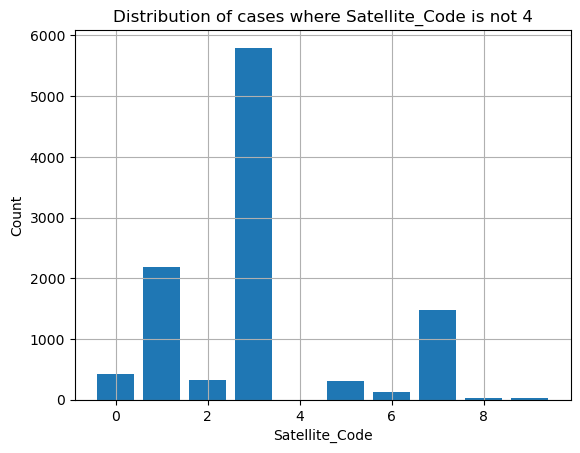

In [104]:
not_4_counts = df2.loc[df2['Satellite_Code'] != 4, 'Satellite_Code'].value_counts()
plt.bar(not_4_counts.index, not_4_counts.values)
plt.xlabel('Satellite_Code')
plt.ylabel('Count')
plt.title('Distribution of cases where Satellite_Code is not 4')
plt.grid(True)
plt.show()

In [105]:
df2['Adjusted_Satellite_Code'] = 4 #created a new column and adjusted the stations to 4

In [106]:
df2.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version2.csv', index=False)

#### Station Number 

First, each subdirectory was manually checked. The 3rd and 4th digit on the metadata was recorded in the following excel sheet "Location_match.csv". The values were added to the CSV file in a column called "Adjusted_Station_Number". 

In [107]:
df1= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version2.csv')

In [108]:
location_match= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Location_match.csv')

In [109]:
merged_df = pd.merge(df1, location_match[['Directory', 'Subdirectory', 'Station_Number']], 
                     on=['Directory', 'Subdirectory'], how='left')

In [110]:
merged_df.rename(columns={'Station_Number_y': 'Adjusted_Station_Number'}, inplace=True)
merged_df.rename(columns={'Station_Number_x': 'Station_Number'}, inplace=True)

In [111]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version3.csv', index=False)


Station_quality shows the level of confidence with 1 if "Adjusted_Station_Number is equal to "Station_Number" column read by OCR. Otherwise it will add a zero. 

In [112]:
merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version3.csv')
merged_df['Station_quality'] = (merged_df['Adjusted_Station_Number'] == merged_df['Station_Number']).astype(int)

C:\Users\rsheikholmolouki\AppData\Local\Temp\ipykernel_4536\71715193.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version3.csv')


In [113]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version4.csv', index=False)


In [114]:
num_instances_with_quality_0 = (merged_df['Station_quality'] == 0).sum()
print("Number of instances where OCR did not read the Station Number correctly:", num_instances_with_quality_0)

Number of instances where OCR did not read the Station Number correctly: 50946


In [115]:
total_instances = len(merged_df)
percentage_quality_0 = (num_instances_with_quality_0 / total_instances) * 100
print("Percentage of instances where OCR did not read the Station Number (3rd and 4th digit) correctly: {:.2f}%".format(percentage_quality_0))

Percentage of instances where OCR did not read the Station Number (3rd and 4th digit) correctly: 11.64%


Finally, we will adjust the Station_Location, Latitude and Longitude based on the "Adjusted_Station_Number" Value.

In [116]:
csv1= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version4.csv')

C:\Users\rsheikholmolouki\AppData\Local\Temp\ipykernel_4536\17372866.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  csv1= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version4.csv')


In [117]:
csv2= pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/Station_Number_Name_Location - Copy.csv')

In [118]:
merged_df = pd.merge(csv1, csv2, left_on='Adjusted_Station_Number', right_on='Number', how='inner')

In [119]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version5.csv', index=False)

### Creation of the Final Master ISIS II CSV File
The original columns that were later adjusted were dropped in this version. 

In [120]:
columns_to_drop = ['Satellite_Code', 'Station_Number', 'Station_Location_x', 'Station_ID_x','Station_Lat','Station_Lon']  
merged_df.drop(columns=columns_to_drop, inplace=True)

In [121]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_MD_Version6.csv', index=False)